In [1]:
# Import packages
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
import pickle
from matplotlib import pyplot as plt
plt.style.use('seaborn')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Optimization terminated successfully.
         Current function value: 0.894827
         Iterations: 168
         Function evaluations: 94437


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


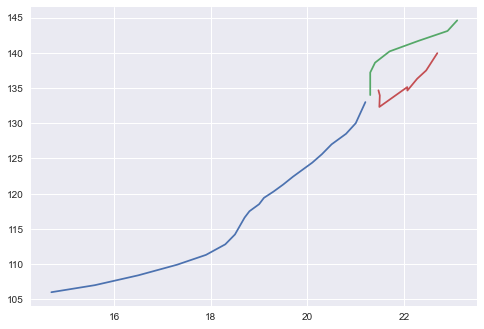

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Optimization terminated successfully.
         Current function value: 1.534843
         Iterations: 74
         Function evaluations: 43539


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


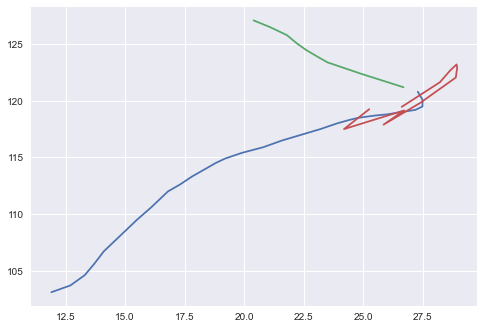

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Optimization terminated successfully.
         Current function value: 0.467106
         Iterations: 129
         Function evaluations: 76364


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


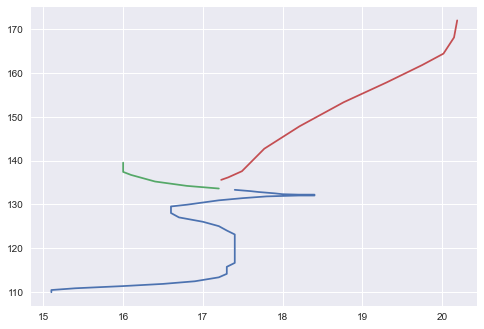

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Optimization terminated successfully.
         Current function value: 1.577093
         Iterations: 45
         Function evaluations: 25400


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


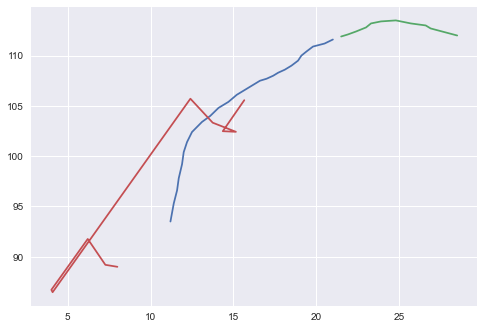

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:396: UserWarning: Non-stationary starting moving-average parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting moving-average parameters'


LinAlgError: Matrix is not positive definite

In [6]:
# Load the data
pacific = pickle.load(open('./../Data/pacific_series.pickle', 'rb'))

for i in range(10, 30):
    # Train on a single hurricane
    hurr = pacific[i].drop(columns=['Status DB',
       'Status EX', 'Status HU', 'Status LO', 'Status SD', 'Status SS',
       'Status TD', 'Status TS'])
    N = hurr.shape[0]
    cutoff = N//5*4
    X = hurr.iloc[1:cutoff, 4:].to_numpy() # Train on 80% of the data
    y = hurr.iloc[1:cutoff, 2:4].to_numpy() # Train on 80% of the data
    y_test = hurr.iloc[cutoff:, 2:4].to_numpy()
    X_test = hurr.iloc[cutoff:, 4:]
    model = VARMAX(endog=y, exog=X, order=(3, 1)).fit(method='powell', maxiter=5000)
    pred = model.predict(start=cutoff, end=N-2, exog=X_test)
    plt.plot(y[:, 0], y[:, 1], label='Observations')
    plt.plot(y_test[:, 0], y_test[:, 1], label='True Trajectory')
    plt.plot(pred[:, 0], pred[:, 1], label='Predicted Trajectory')
    plt.show()